# Rainfall_Prediction_using_Machine_Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
rain= pd.read_csv(r'Rainfall.csv')
rain.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [3]:
rain.tail()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9
365,31,1026.4,20.5,17.8,15.5,13.0,74,66,no,5.7,20.0,23.3


# # Explotary Data Analysis (EDA)

In [4]:
rain.shape

(366, 12)

In [5]:
rain.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [6]:
## How many are numerical features
rain.select_dtypes(include='number').columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [7]:
## How many are Categoricall features
rain.select_dtypes(include='object').columns

Index(['rainfall'], dtype='object')

In [8]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [9]:
## Remove Extra Space from all features
rain.columns = rain.columns.str.strip()

In [10]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    object 
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [11]:
rain.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,365.000000,365.000000
mean,15.756831,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,4.419399,101.506849,21.536986
std,8.823592,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,3.934398,81.723724,10.069712
min,1.000000,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,10.000000,4.400000
25%,8.000000,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.500000,40.000000,13.700000
50%,16.000000,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,3.500000,70.000000,20.500000
75%,23.000000,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,8.200000,190.000000,27.900000
max,31.000000,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,12.100000,350.000000,59.500000


In [12]:
## Drop Day feature
rain.drop(['day'],axis=1,inplace=True)
rain.shape

(366, 11)

In [13]:
## Check & remove null values
rain.isna().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64

In [14]:
## Remove null values
rain.dropna(inplace=True)
rain.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

In [15]:
## Check & remove duplicate values
rain.duplicated().sum()

0

## Data Summarization & Visulization
**Data distribution of numerical features**

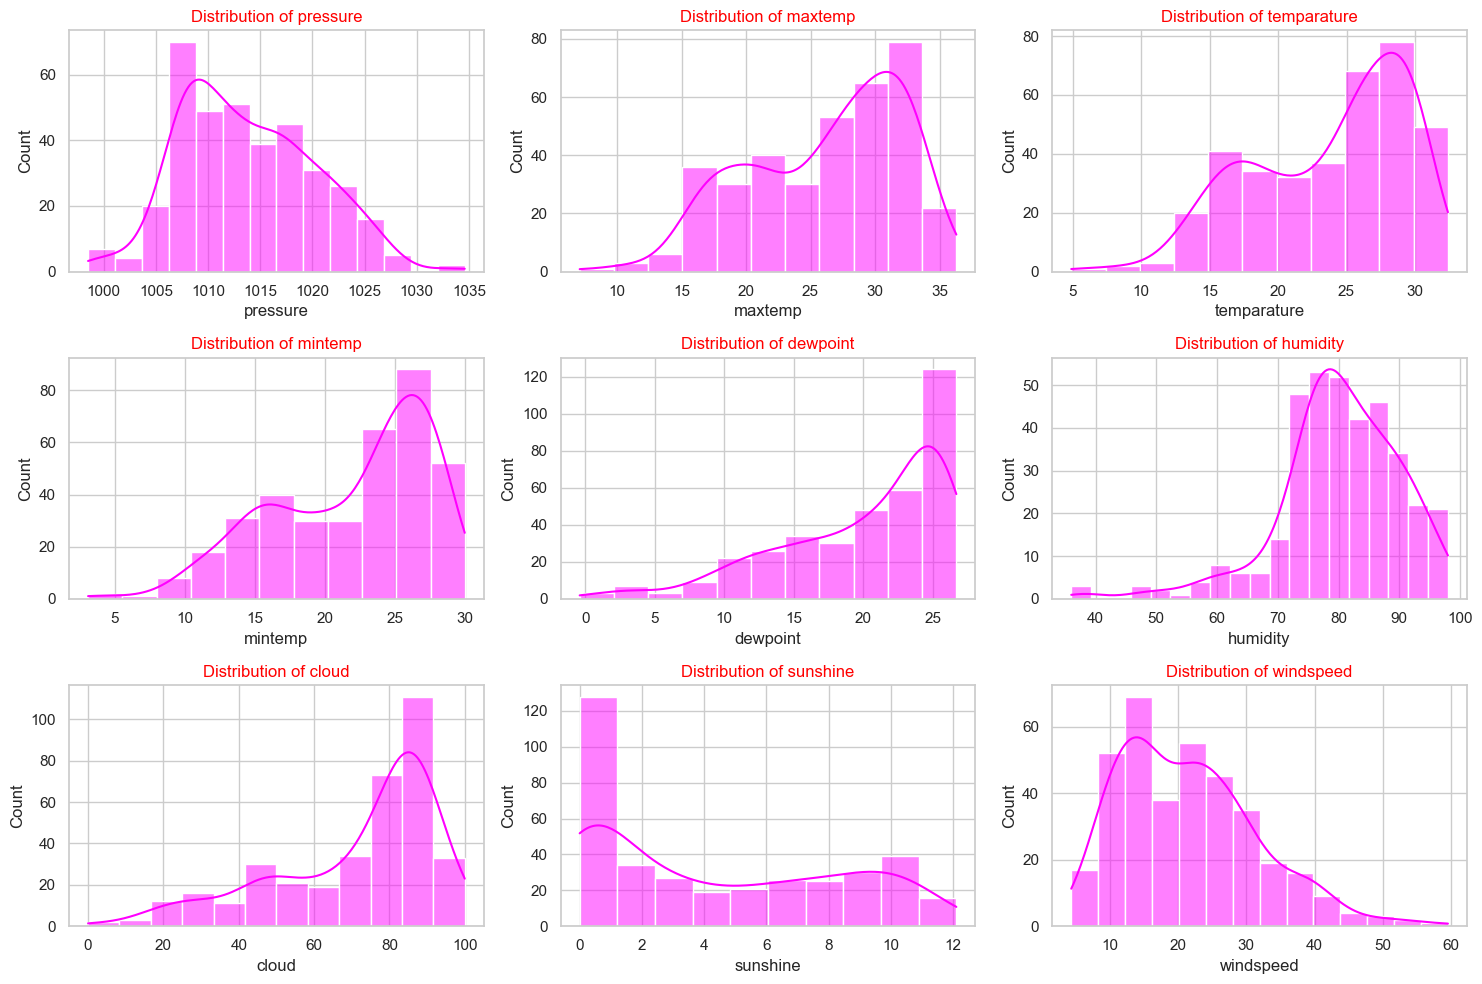

In [16]:
# setting plot style for all the plots
sns.set(style="whitegrid")

plt.figure(figsize=(15, 10))
for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity','cloud', 'sunshine', 'windspeed'], 1):
  plt.subplot(3, 3, i)
  sns.histplot(rain[column], kde=True,color='magenta')
  plt.title(f"Distribution of {column}",color='red')

plt.tight_layout()
plt.show()

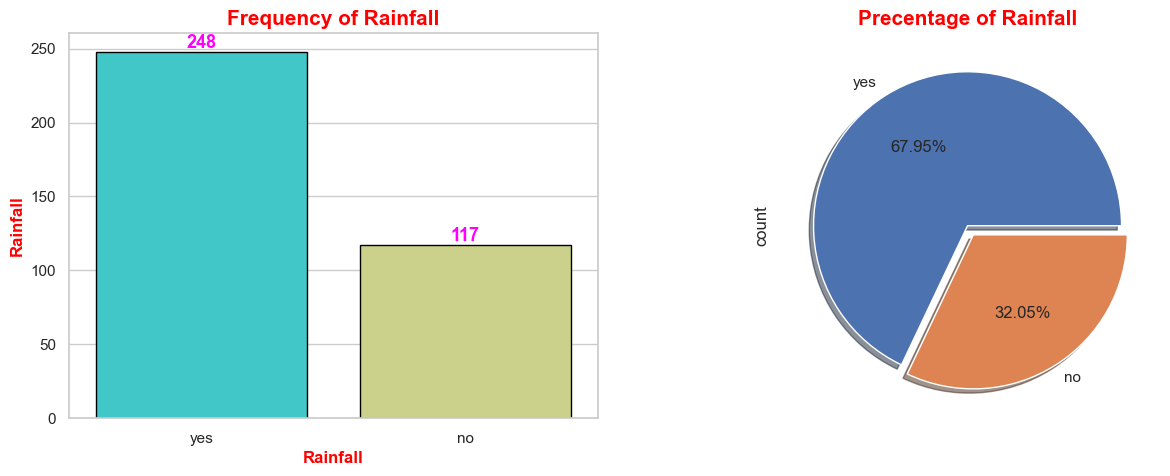

In [17]:
## Data Summarization & Visulization
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax=sns.countplot(x=rain['rainfall'],palette='rainbow',edgecolor='black')
ax.bar_label(ax.containers[0],color='magenta',fontsize=13,weight='bold')
ax.bar_label(ax.containers[1],color='magenta',fontsize=13,weight='bold')
plt.title('Frequency of Rainfall',color='red',fontsize=15,weight='bold')
plt.xlabel('Rainfall',color='red',fontsize=12,weight='bold')
plt.ylabel('Rainfall',color='red',fontsize=12,weight='bold')

plt.subplot(1,2,2)
rain['rainfall'].value_counts().plot(kind='pie',shadow=True,autopct='%0.2f%%',explode=[0,0.07])
plt.title('Precentage of Rainfall',color='red',fontsize=15,weight='bold')
plt.show()

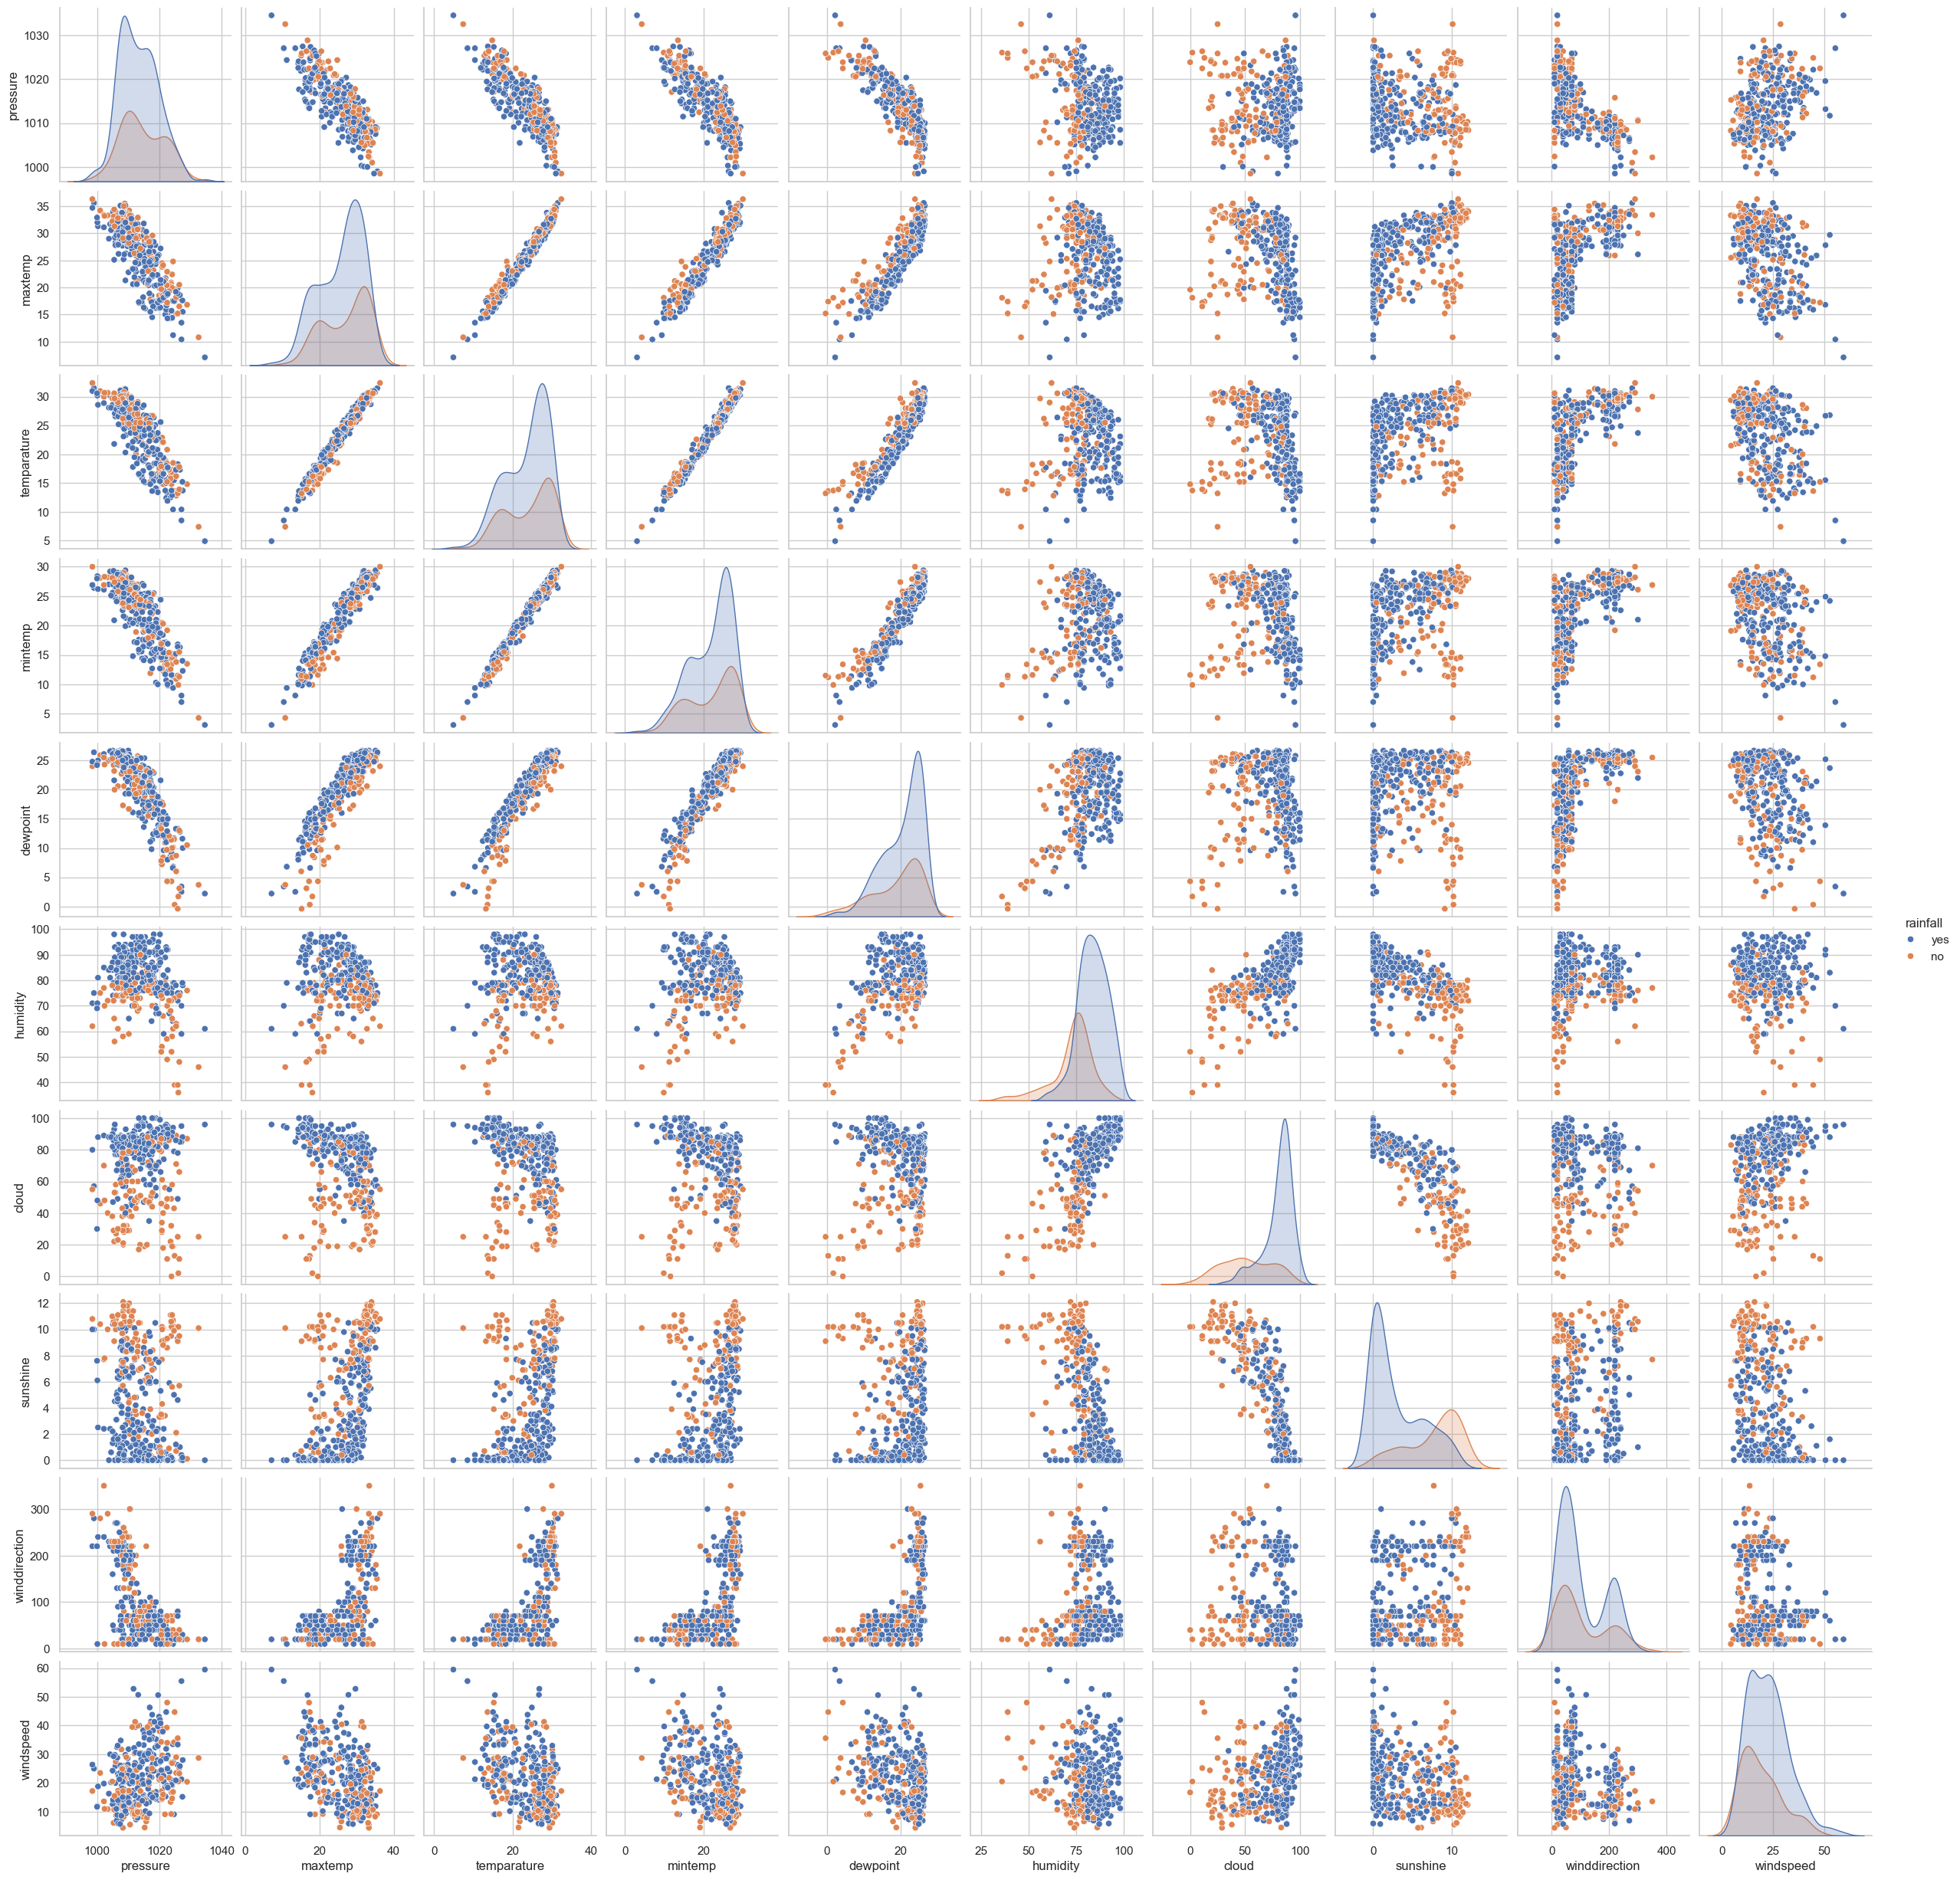

In [18]:
sns.pairplot(data=rain,hue='rainfall')
plt.show()

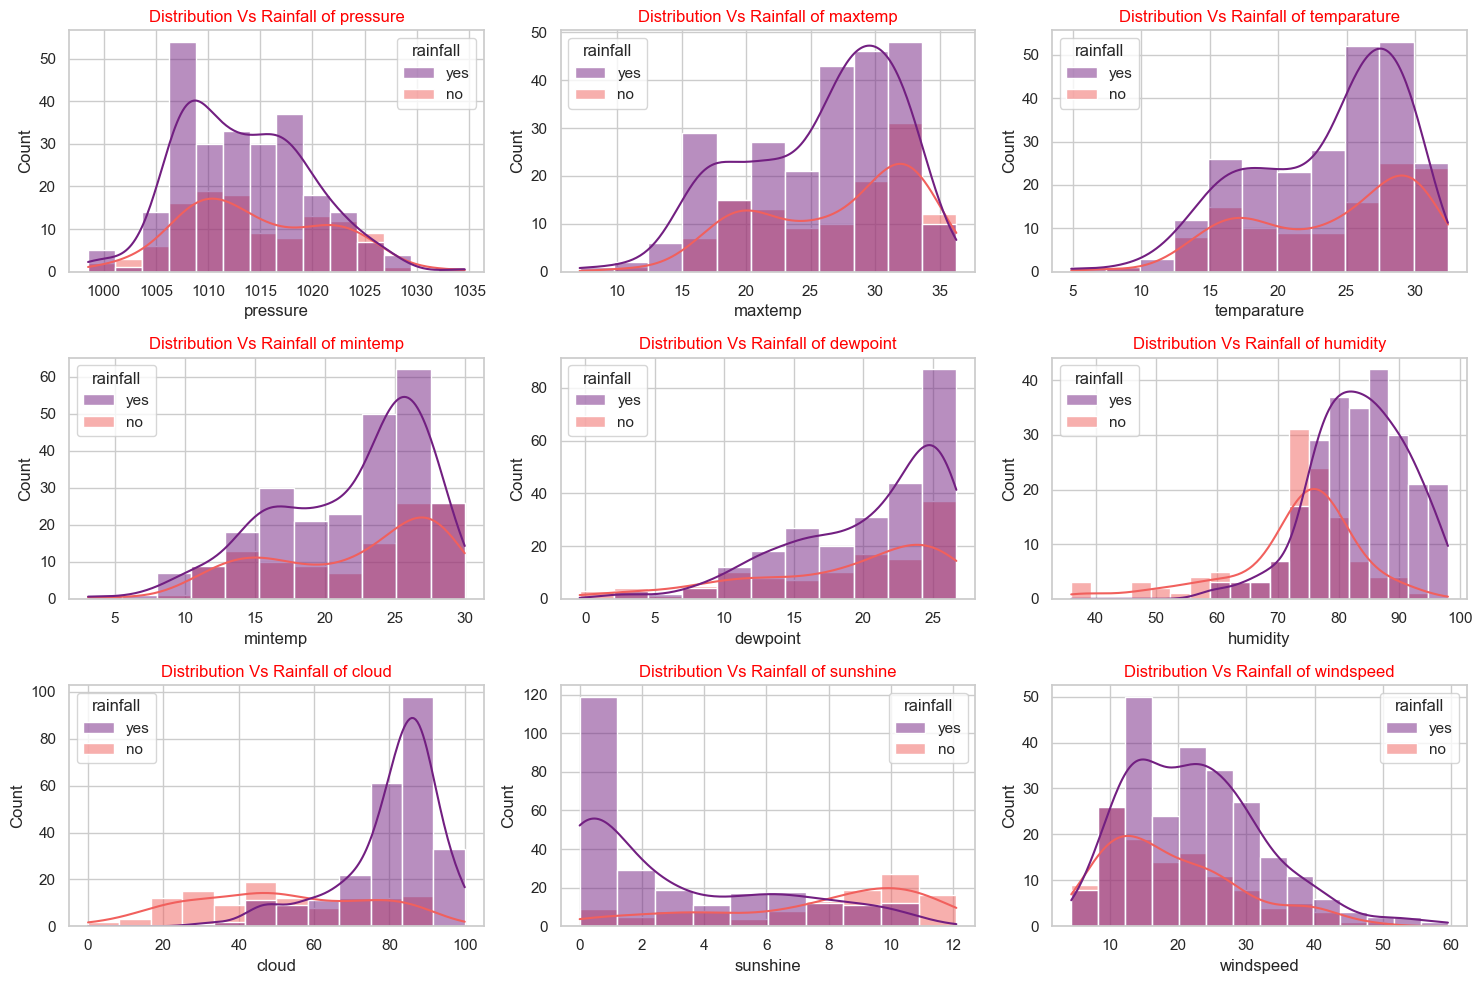

In [19]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
                            'humidity', 'cloud', 'sunshine', 'windspeed'], 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=rain, x=column, hue='rainfall', kde=True, palette='magma')
    plt.title(f"Distribution Vs Rainfall of {column}", color='red')

plt.tight_layout()
plt.show()


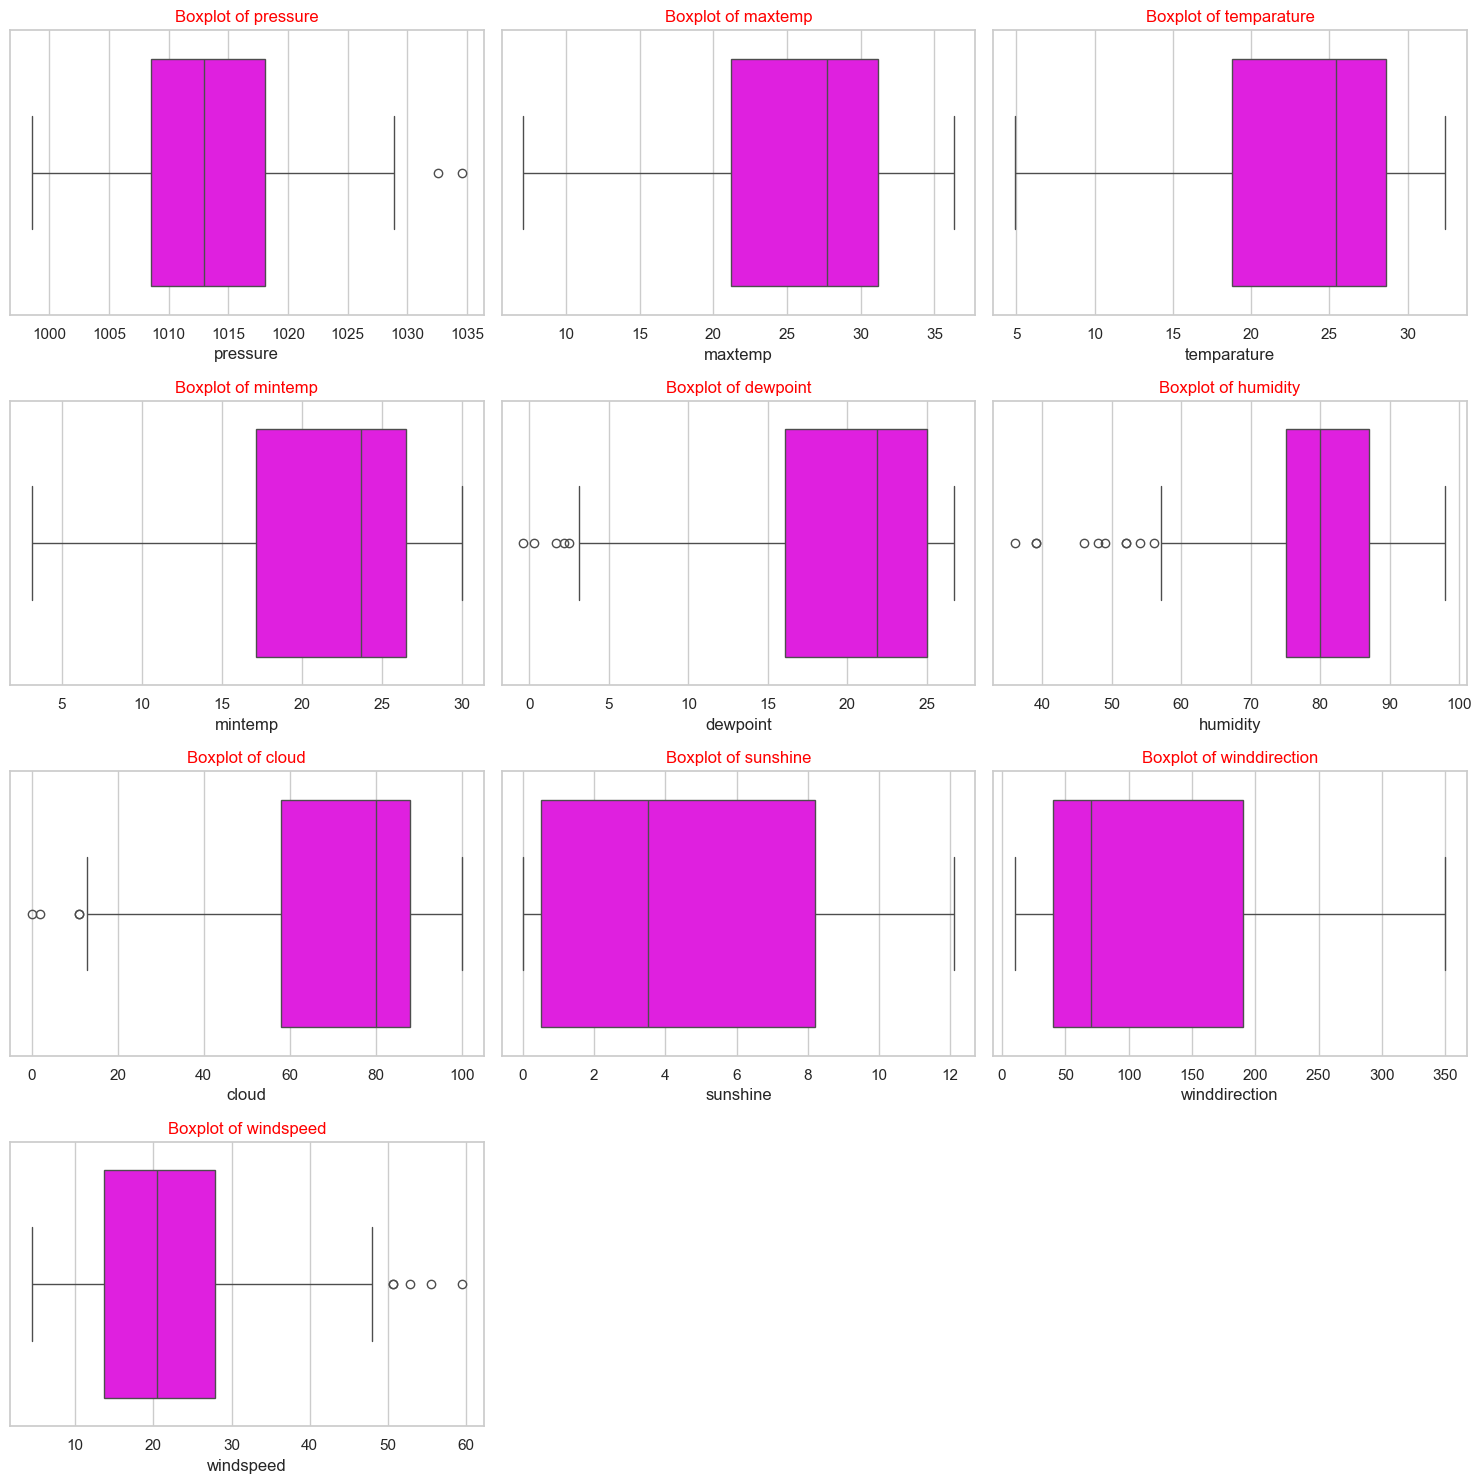

In [20]:
num_cols = rain.select_dtypes(include='number').columns

plt.figure(figsize=(15, 15))

for idx, col in enumerate(num_cols, 1):  # idx for subplot index, col for column name
    plt.subplot(4, 3, idx)
    sns.boxplot(data=rain, x=col, color='magenta')
    plt.title(f"Boxplot of {col}", color='red')

plt.tight_layout()
plt.show()

In [21]:
num_cols = rain.select_dtypes(include='number').columns
print(len(num_cols)) 

10


In [22]:
## We are Cappng the outliers
for i in num_cols:
    q1=rain[i].quantile(0.25)
    q3=rain[i].quantile(0.75)
    iqr= q3-q1

    lower_limit= q1-1.5*iqr
    upper_limit= q3+1.5*iqr

    rain[i]=np.where(rain[i] > upper_limit,upper_limit,
    np.where(rain[i] < lower_limit,lower_limit,
            rain[i])
    )

In [23]:
rain.shape

(365, 11)

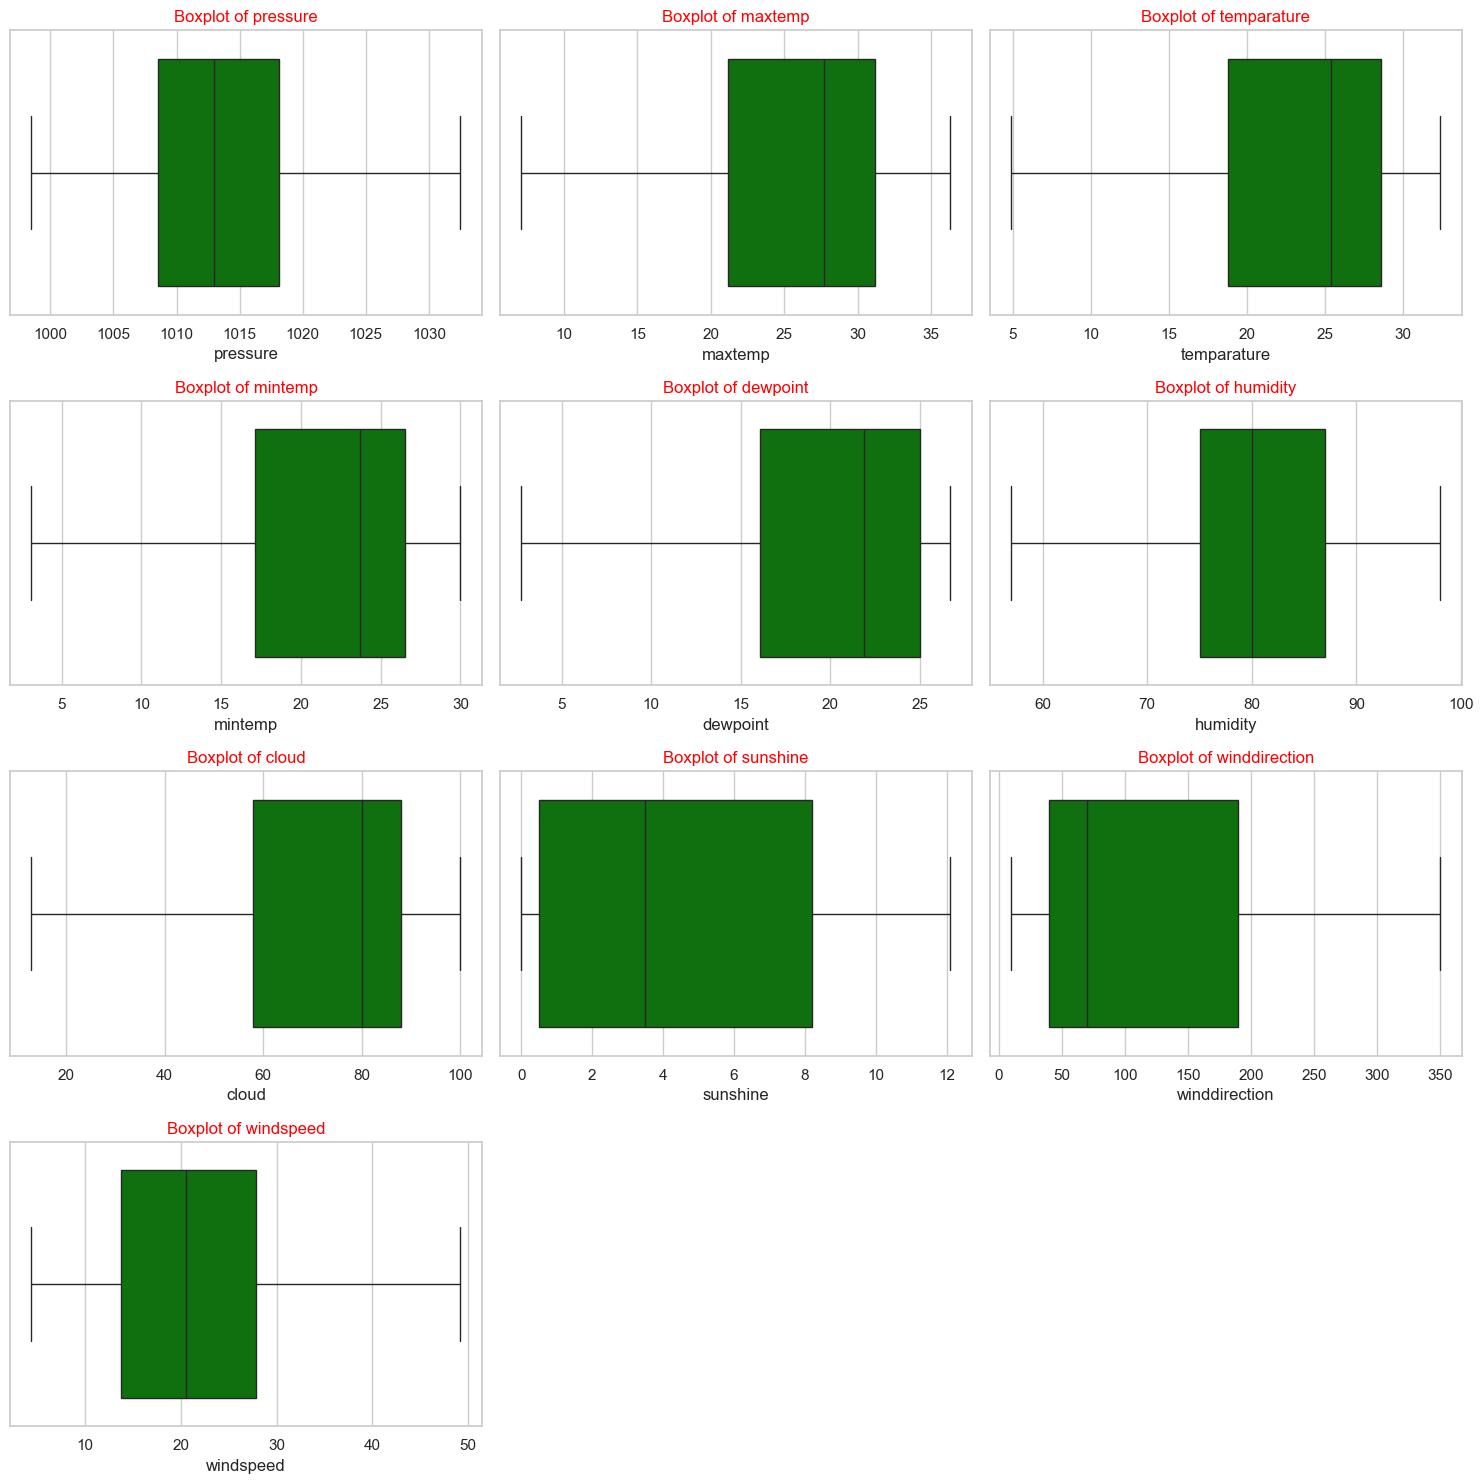

In [24]:
num_cols = rain.select_dtypes(include='number').columns

plt.figure(figsize=(15, 15))

for idx, col in enumerate(num_cols, 1):  # idx for subplot index, col for column name
    plt.subplot(4, 3, idx)
    sns.boxplot(data=rain, x=col, color='green')
    plt.title(f"Boxplot of {col}", color='red')

plt.tight_layout()
plt.show()

In [25]:
rain.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72.0,49.0,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81.0,83.0,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95.0,91.0,yes,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90.0,88.0,yes,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95.0,81.0,yes,0.0,40.0,13.7


# Feature Engineering
- **1.) Encoding**

In [26]:
rain['rainfall'].unique()

array(['yes', 'no'], dtype=object)

In [27]:
## We are applying Label encoding becuse target Feature is a Categorical datatype
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
le.fit(rain['rainfall'])
rain['rainfall']=le.transform(rain['rainfall'])

In [28]:
rain.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72.0,49.0,1,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81.0,83.0,1,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95.0,91.0,1,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90.0,88.0,1,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95.0,81.0,1,0.0,40.0,13.7


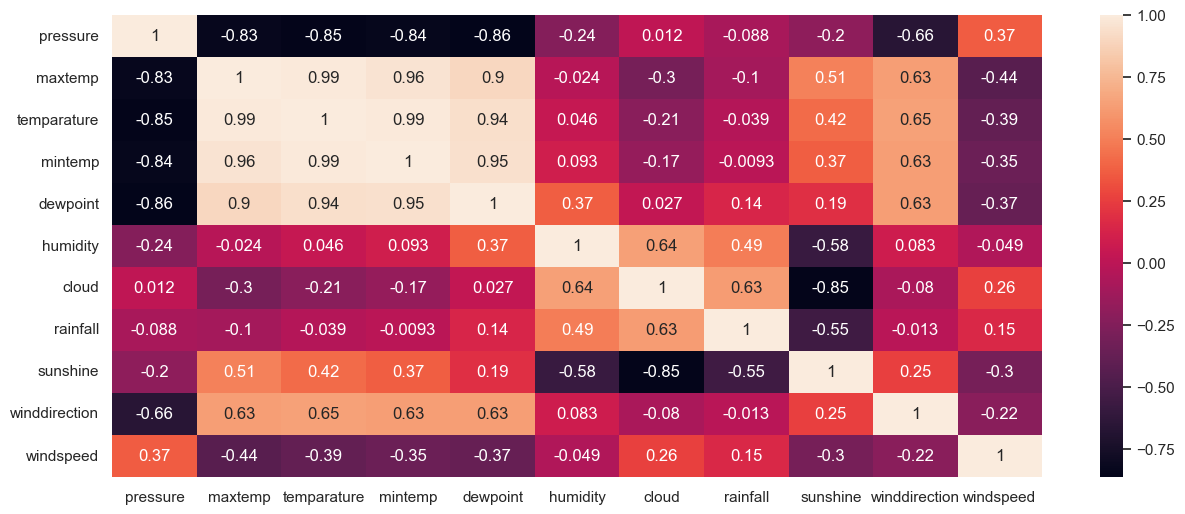

In [29]:
## Find a relation between Input & output Features
plt.figure(figsize=(15,6))
sns.heatmap(data=rain.corr(),annot=True)
plt.show()

In [30]:
## Take x= input features & y= output features
x= rain.drop(['rainfall'],axis=1)
y= rain['rainfall']

In [31]:
x.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72.0,49.0,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81.0,83.0,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95.0,91.0,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90.0,88.0,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95.0,81.0,0.0,40.0,13.7


In [32]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: rainfall, dtype: int32

- **2.) Feature Scaling**

In [33]:
## We use Standardization technique
from sklearn.preprocessing import StandardScaler
scaled= StandardScaler()
scaled.fit(x)
new_df=pd.DataFrame(scaled.transform(x),columns=x.columns)
new_df.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1.902352,-1.051043,-0.965723,-0.909269,-1.163220,-0.916587,-1.028466,1.242421,-0.263527,0.489609
1,1.291287,-0.749605,-0.859113,-0.837696,-0.741387,0.061642,0.547829,-0.969695,-0.631121,-0.626298
2,0.930915,-0.984057,-0.788040,-0.694551,-0.268933,1.583332,0.918723,-1.122254,-0.753652,-0.737888
3,0.805568,-0.649125,-0.557051,-0.497725,-0.201440,1.039871,0.779638,-0.867988,-0.631121,-0.463984
4,0.335517,-0.816591,-0.539282,-0.300900,-0.015833,1.583332,0.455106,-1.122254,-0.753652,-0.788611


- **Train test split**

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(new_df,y,test_size=0.20,random_state=33)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(292, 10) (73, 10) (292,) (73,)


- **Biuld ML Model**

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score, classification_report

In [36]:
models= {
    'Logistic Regression':LogisticRegression(),
    'naive bayes GaussianNB':GaussianNB(),
    'naive bayes BernoulliNB':BernoulliNB(),
    'KNN':KNeighborsClassifier(),
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),
    'SVC':SVC()
}

results= []
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc=accuracy_score(y_test,y_pred)*100
    f1=f1_score(y_pred,y_test)*100
    recall= recall_score(y_pred,y_test)*100
    precision= precision_score(y_pred,y_test)*100
    results.append({
        'model':name,
        'accuracy_score':round(acc,2),
        'f1_score':f1,
        'recall':recall,
        'precision_score':precision
    })

In [37]:
results

[{'model': 'Logistic Regression',
  'accuracy_score': 87.67,
  'f1_score': 90.9090909090909,
  'recall': 93.75,
  'precision_score': 88.23529411764706},
 {'model': 'naive bayes GaussianNB',
  'accuracy_score': 86.3,
  'f1_score': 89.58333333333334,
  'recall': 95.55555555555556,
  'precision_score': 84.31372549019608},
 {'model': 'naive bayes BernoulliNB',
  'accuracy_score': 80.82,
  'f1_score': 85.1063829787234,
  'recall': 93.02325581395348,
  'precision_score': 78.43137254901961},
 {'model': 'KNN',
  'accuracy_score': 84.93,
  'f1_score': 89.10891089108911,
  'recall': 90.0,
  'precision_score': 88.23529411764706},
 {'model': 'Decision Tree',
  'accuracy_score': 67.12,
  'f1_score': 74.46808510638297,
  'recall': 81.3953488372093,
  'precision_score': 68.62745098039215},
 {'model': 'Random Forest',
  'accuracy_score': 86.3,
  'f1_score': 90.19607843137256,
  'recall': 90.19607843137256,
  'precision_score': 90.19607843137256},
 {'model': 'SVC',
  'accuracy_score': 84.93,
  'f1_scor

## Logistic regression algorithm gives better accuracy as compare to other algorithm then we consider logistic regression model and it's accuracy is 88.67

######

- **Check K-fold cross validtion gives better accuracy or not**

In [38]:
## use for Logistic Regression
from sklearn.model_selection import cross_val_score
logistic= LogisticRegression()
cross_logistic= cross_val_score(logistic,new_df,y,cv=10,scoring='accuracy')
print("Logistic Regression Cross-validation R2 scores:", cross_logistic)
print("Mean accuracy is:", round(cross_logistic.mean(),2)*100)

Logistic Regression Cross-validation R2 scores: [0.81081081 0.86486486 0.72972973 0.75675676 0.94594595 0.86111111
 0.66666667 0.77777778 0.77777778 0.80555556]
Mean accuracy is: 80.0


In [39]:
## Use for Random Forest
forest= RandomForestClassifier()
cross_forest= cross_val_score(forest,new_df,y,cv=5,scoring='accuracy')
print("Random forest Cross-validation scores:", cross_forest)
print("Mean Accuracy:", cross_forest.mean()*100)

Random forest Cross-validation scores: [0.83561644 0.7260274  0.83561644 0.75342466 0.68493151]
Mean Accuracy: 76.7123287671233


In [40]:
## Use for knn
knn= KNeighborsClassifier()
cross_knn= cross_val_score(knn,new_df,y,cv=5,scoring='accuracy')
print("KNN Cross-validation scores:", cross_knn)
print("Mean Accuracy:", cross_knn.mean()*100)

KNN Cross-validation scores: [0.84931507 0.7260274  0.75342466 0.76712329 0.67123288]
Mean Accuracy: 75.34246575342466


In [41]:
## Use for Decision tree
tree= DecisionTreeClassifier()
cross_tree= cross_val_score(tree,new_df,y,cv=10,scoring='accuracy')
print("Decision Tree Cross-validation scores:", cross_tree)
print("Mean Accuracy:", cross_tree.mean()*100)

Decision Tree Cross-validation scores: [0.78378378 0.7027027  0.75675676 0.67567568 0.86486486 0.77777778
 0.66666667 0.72222222 0.63888889 0.69444444]
Mean Accuracy: 72.83783783783784


In [42]:
## Use for Naive Bayes
bayes= GaussianNB()
cross_bayes= cross_val_score(bayes,new_df,y,cv=10,scoring='accuracy')
print("naive Bayes Cross-validation scores:", cross_bayes)
print("Mean Accuracy:", cross_bayes.mean()*100)

naive Bayes Cross-validation scores: [0.72972973 0.86486486 0.72972973 0.81081081 0.89189189 0.77777778
 0.72222222 0.80555556 0.77777778 0.80555556]
Mean Accuracy: 79.15915915915916


In [43]:
## Use for SVC
svc= SVC()
cross_svc= cross_val_score(svc,new_df,y,cv=5,scoring='accuracy')
print("Random forest Cross-validation scores:", cross_svc)
print("Mean Accuracy:", cross_svc.mean()*100)

Random forest Cross-validation scores: [0.84931507 0.75342466 0.91780822 0.73972603 0.78082192]
Mean Accuracy: 80.82191780821917


**Support Vector Machine(SVC) gives better accuracy as compare to another model in K-fold cross validation**

## Conculsion
- **We deploy Logistic Regression model becuse it`s gives best accuracy 87.67**